In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy
%matplotlib inline

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## House pricing

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [11]:
train_data = #считайте файл train_housing и выведите первые 5 строк

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Предсказание сердечно-сосудистых заболеваний

https://mlbootcamp.ru/round/12/sandbox/

In [404]:
train_data = # скачайте сюда данные из train_med, delimiter=';'
# выведите первые 5 строк

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [405]:
X_train, Y_train = #положите в Y_train cardio, это будет целевой вектор. В  X_train положите объекты и признаки

In [378]:
from sklearn.ensemble import RandomForestClassifier

rf = # положите сюда классификатор, укажите n_estimators=100
cross_val_score(rf, X_train, Y_train, scoring='accuracy') 

array([0.50471415, 0.72310791, 0.5819904 ])

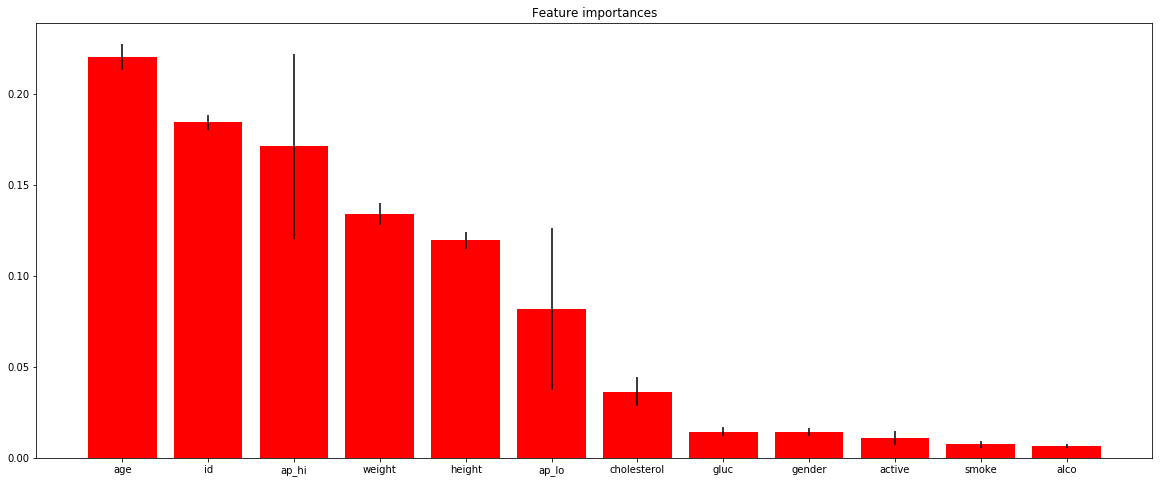

In [388]:
importances = #  выведите важность признаков  при помощи функции feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(20, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), train_data.drop("cardio", axis=1).columns[indices])
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [390]:
from sklearn.grid_search import GridSearchCV

rf = # положите сюда классификатор
params = {
    'n_estimators': [ # положите сюда 3 значения через запятую для параметра n_estimators по своему усмотрению. Например, 50, 75, 100]
}
gsv = GridSearchCV(estimator=# передайте сюда ваш классификатор,
                   param_grid=# передайте сюда параметры для перебора, 
                   scoring='accuracy', cv=3, verbose=1)
gsv.fit(X_train, Y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [391]:
print(gsv.best_params_, gsv.best_score_)

{'n_estimators': 500} 0.6105857142857143


#### XGBoost

In [3]:
#Проведите аналогичные вычисления для GradientBoostingClassifier 
#Подробнее: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

### Model Ensembles

Мы можем предсказывать не класс, а вероятности классов:

In [412]:
train_data = pd.read_csv("train_med.csv", delimiter=';')

X_train, Y_train = np.array(train_data.drop("cardio", axis=1)), np.array(train_data['cardio'])

In [413]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.15, random_state=37)

In [417]:
rf = RandomForestClassifier(n_estimators=100).fit(X_train, Y_train)
pred = rf.predict_proba(X_test)

In [420]:
pred

array([[0.25, 0.75],
       [0.32, 0.68],
       [0.68, 0.32],
       ...,
       [0.12, 0.88],
       [0.42, 0.58],
       [0.2 , 0.8 ]])

In [1]:
estimator1 = # выберите ваш любимый классификатор
estimator2 = # выберите другой ваш любимый классификатор

estimator1.fit(X_train, Y_train)
estimator2.fit(X_train, Y_train)

pred1 = estimator1.predict_proba(X_test)[:, 1]
pred2 = estimator2.predict_proba(X_test)[:, 1]
